# [IAPR 2020:][iapr2020] Lab 3 ‒  Classification

**Author:** first_name_1 last_name_1, first_name_2 last_name_2, first_name_3 last_name_3  
**Due date:** 08.05.2020

[iapr2018]: https://github.com/LTS5/iapr-2018

## Extract relevant data
We first need to extract the `lab-03-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [2]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-03-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import stats

## Part 1
In this part, we will study classification based on the data available in the Matlab file `classification.mat` that you will under `lab-03-data/part1`.
There are 3 data sets in this file, each one being a training set for a given class.
They are contained in variables `a`, `b` and `c`.

**Note**: we can load Matlab files using the [scipy.io] module.

[scipy.io]: https://docs.scipy.org/doc/scipy/reference/io.html

In [4]:
import scipy.io

data_part1_path = os.path.join(data_base_path, data_folder, 'part1', 'classification.mat')
matfile = scipy.io.loadmat(data_part1_path)
a = matfile['a']
b = matfile['b']
c = matfile['c']

print(a.shape, b.shape, c.shape)

(200, 2) (200, 2) (200, 2)


### 1.1 Bayes method
Using the Bayes method, give the analytical expression of the separation curves between those three classes.
Do reasonable hypotheses about the distributions of those classes and estimate the corresponding parameters based on the given training sets.
Draw those curves on a plot, together with the training data.
For simplicity reasons, round the estimated parameters to the closest integer value.


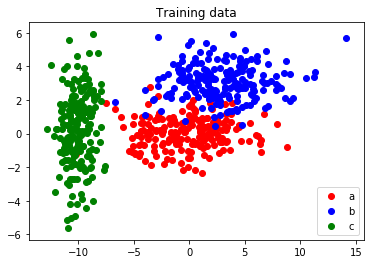

In [5]:
data=[a,b,c]
labels=['a','b','c']
colors=['r','b','g']
plt.figure()
for mat, label, color in zip(data,labels,colors):
    plt.scatter(mat[:,0],mat[:,1],label=label,color=color)
    plt.legend()
plt.title("Training data")
plt.show()

We can distinguish the 3 classes as they more or less form 3 clusters. Class `c` is more isolated than the 2 others which are overlapping a little.

Based on the elipsoidal shape of the classes, we can hypothetise that they follow a Gaussian distribution. Moreover, each class has the same number of data points. 

We can also hypothesis on the similarities in their covariances matrix. It seems like classes `a` and `b` present a similar shape so we expect the covariance matrix to be similar.

#### Gaussian-like distribution
To confirm our hypothesis on the normality of the classes, we compute for each dimension of each class, its skewness metric, which calculate the relative sizes of the tail of the distribution, and its kurtosis metric, which is a measure of the combined sizes of the two tails. A Gaussian distribution has both values at zero.

In [7]:
labels = ['A_x', 'A_y', 'B_x', 'B_y', 'C_x', 'C_y']

skewness = stats.skew(np.concatenate([a, b, c], axis = 1))
kurtosis = stats.kurtosis(np.concatenate([a, b, c], axis = 1))

#display results 
results=pd.DataFrame(index=labels, columns=['Skewness', 'Kurtosis'], data = np.asarray([skewness, kurtosis]).T)
results

,Skewness,Kurtosis
A_x,0.041372,-0.045881
A_y,-0.036840,-0.012634
B_x,0.297702,0.536314
B_y,0.173471,-0.026025
C_x,0.087623,-0.218837
C_y,-0.151689,-0.061470


##### Analysis 
We can see that the values for both skewness and kurtosis are close to zero. We can consider that the clusters are good approximations of Gaussian distributions.


#### Parameters

**Useful fomula**

 - _Bayes rule_:  $ P(w_i|x)=\frac{p(x|w_i)P(w_i)}{p(x)} $

 - _Discriminant function_ ($f$ monotonnally increasing): $g_i(x)=f(P(w_i|x))$
 
 - _Decision surface_: $g_{ij}=g_i(x)-g_j(x)=0$

 - _Mean_: $u_x=\cfrac{1}{n}\sum_{j=1}^{n}{x}$ and $u_y=\cfrac{1}{n}\sum_{j=1}^{n}{y}$

 - _Covariance matrix_: $\Sigma ＝ \cfrac{1}{n}(u-\hat\mu)^T(u-\hat\mu) \quad$

**Bayesian classification for normal distribution**

Since the 3 classes can be modeled as Gaussians and have the same priori probabilities because they contain the same amount of data points, the discriminant function can be given as:

$g_i(x)=-\frac{1}{2} x^T \Sigma^{-1}_i x + \frac{1}{2} x^T \Sigma^{-1}_i \mu_i + \frac{1}{2} \mu^{T}_i \Sigma^{-1}_i x + ln P(w_i) + c_i$

**Special case**

If 2 classes have the same covariance matrix (we hypothesis `a` and `b` in our case), the quadratic terms disappear in the equation of the decision curves, as well as the constant $c_i$ and the discriminant function can be rewrite as:

$g_i(x)=w_i^Tx+w_{i0}=(\Sigma^{-1} \mu_i)^Tx+ln(P(w_i))-\frac{1}{2}\mu_i^T \Sigma^{-1}\mu_i$

Therefore, the discriminant functions are linear and the decision curves are hyperplanes. 
The decisions hyperplanes are defined as:

$g_{ij}(x) = w^T(x - x_{0})$ with $w = \Sigma^{-1}(\mu_i - \mu_j)$

In [8]:
def get_coefficient(data):
    # calculate param of a Gaussian distribution
    
    mean = data.mean(axis=0)
    lenght = len(data)
    cov = (np.dot((data-mean).T, data-mean)/lenght)

    return mean.round(), cov.round()

In [9]:
#calculate param for our classes (considered as gaussian dist)
means = []
covs = []
i = 0

for label, mat in zip(labels, data):
    mean, cov = get_coefficient(mat)
    means.append(mean)
    covs.append(cov)
    
    #display results 
    print('Mean for class {} :\n {}'.format(label, mean))
    print('Covariance matrix for class {} :\n {}\n'.format(label, cov))

Mean for class A_x :
 [-0.  0.]
Covariance matrix for class A_x :
 [[10.  0.]
 [ 0.  1.]]

Mean for class A_y :
 [3. 3.]
Covariance matrix for class A_y :
 [[10.  0.]
 [ 0.  1.]]

Mean for class B_x :
 [-10.   0.]
Covariance matrix for class B_x :
 [[1. 0.]
 [0. 5.]]



##### Analysis 
We can see that indeed the covariance matrix of `a` and `b` are identical. This means that we can use the corresponding rewritten formula for the discriminant function and decision hyperplanes. Now, we can easily find the corresponding linear function which is able to classify classes `a` and `b`.

Hence, we can calculate the decision curve for each inter-classes classification, based on the full formula: 

$g_i(x)=-\frac{1}{2} x^T \Sigma^{-1}_i x + \frac{1}{2} x^T \Sigma^{-1}_i \mu_i + \frac{1}{2} \mu^{T}_i \Sigma^{-1}_i x + ln P(w_i) + c_i$

We expect a linear decision curve between classes `a` and `b` and non-linear curves for the 2 other comparisons. 

In [10]:
def get_discriminant_curve_coeff(data_1, data_2):
    """""
    calculate the coefficient of quadratic term, 
    primary term and constant term 
    of x and y according to the equation above
    in the end we round the coefficient to the closest integer 
    """""
    
    #get parameters for each data set
    mean_1, cov_1 = get_coefficient(data_1)
    mean_2, cov_2 = get_coefficient(data_2)
    
    #revison of the parameters (1 variable for each value)
    mean_11 , mean_12 = mean_1[0] , mean_1[1]
    mean_21 , mean_22 = mean_2[0] , mean_2[1]
    cov_11 , cov_12 = cov_1[0][0] , cov_1[1][1]
    cov_21 , cov_22 = cov_2[0][0] , cov_2[1][1]
    
    #compute the coefficients (development of matrix multiplication)
    coef_x_2 = (cov_21-cov_11) * cov_12 * cov_22
    coef_y_2 = (cov_22-cov_12) * cov_11*cov_21
    
    coef_x_1 = (-2 * mean_11 * cov_21 + 2 * mean_21 * cov_11) * cov_12 * cov_22
    coef_y_1 = (-2 * mean_12 * cov_22 + 2 * mean_22 * cov_12) * cov_11 * cov_21
    
    coef_constant_1 =  mean_11 * mean_11 * cov_12 * cov_21 * cov_22 + mean_12 * mean_12 * cov_11 * cov_21 * cov_22
    coef_constant_2 = -mean_21 * mean_21 * cov_11 * cov_12 * cov_22 - mean_22 * mean_22 * cov_11 * cov_12 * cov_21
    
    coef_constant = coef_constant_1 + coef_constant_2
    
    #group all the coeff together
    coeff_array = np.array([coef_x_2, coef_x_1, coef_y_2, coef_y_1, coef_constant])
   
    return np.round(coeff_array)

In [11]:
def get_curve(coeff, x, y):
    return coeff[0]*x**2 + coeff[1]*x + coeff[2]*y**2 + coeff[3]*y + coeff[4]

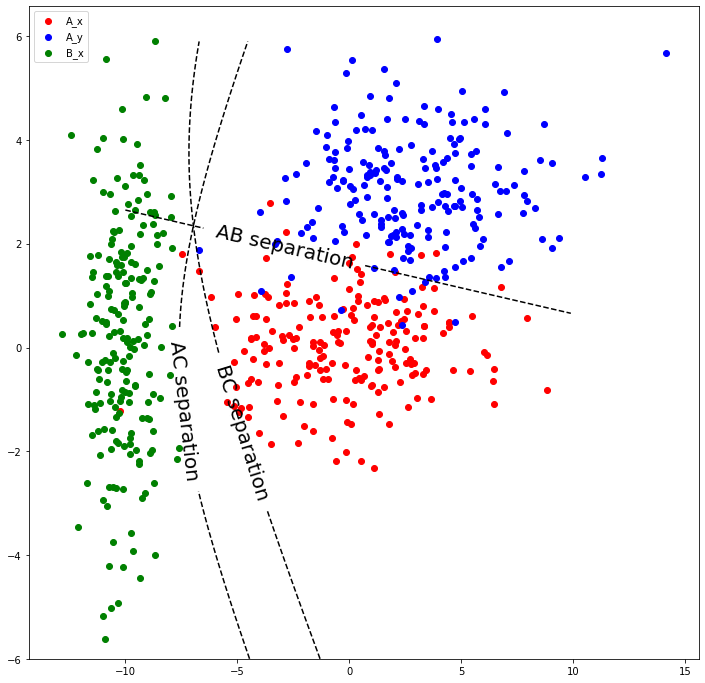

In [12]:
x_range = np.arange(-10, 10, 0.1)
y_range = np.arange(-6, 6, 0.1)
x_range, y_range = np.meshgrid(x_range, y_range)

coeff_ab = get_discriminant_curve_coeff(a,b)
coeff_ac = get_discriminant_curve_coeff(a,c)
coeff_bc = get_discriminant_curve_coeff(b,c)

curve_ab = get_curve(coeff_ab, x_range, y_range)
curve_ac = get_curve(coeff_ac, x_range, y_range)
curve_bc = get_curve(coeff_bc, x_range, y_range)

#display results 
name_curves=['AB separation', 'AC separation', 'BC separation']

fig, ax = plt.subplots(figsize=(12, 12))
#display training data
for label, mat, color in zip(labels,data,colors):
    ax.scatter(mat[:,0], mat[:,1], label=label, color=color)
#display decision curves
for label, curve in zip(name_curves, [curve_ab, curve_ac, curve_bc]):
    contour_item = ax.contour(x_range, y_range, curve, 0, linestyles='dashed', colors='black')
    contour_item.levels = [label for val in contour_item.levels]
    ax.clabel(contour_item, contour_item.levels, inline=True, fontsize=20, colors='black')
plt.legend()
plt.show()

##### Analysis 
We can indeed see that the separation line AB is linear while the 2 others are not.

### 1.2 Mahalanobis distance
For classes `a` and `b`, give the expression of the Mahalanobis distance used to classify a point in class `a` or `b`, and verify the obtained classification, in comparison with the "complete" Bayes classification, for a few points of the plane.

If we neglect the constant, the discriminant function can be written as: 

$g_i(x)=-\frac{1}{2}(x-\mu_i)^T\Sigma^{-1}_i(x-\mu_i)$

Hence, if the covariance matrix $\Sigma$ of the 2 classes is not diagonal, the most probable class is the one that minimize $g_i(x)$ which corresponds to minimizing the Mahalanobis distance: 

$d_m=((x-\mu_i)\Sigma^{-1}(x-\mu_i))^{\frac{1}{2}}$

Because the Mahalanobis distance classification won't be checkable by itself, we write functions to assess the performances of both methods (Bayesian vs  Mahalanobis distance) by comparing the accuracy of their predictions. 

In [13]:
def get_mahalarnobis_distance(data, point):
    # calculate mahalanobis distance of a data point from a dataset 
    mean, cov = get_coefficient(data)
    inv_cov = np.linalg.inv(cov)
    return np.sqrt((point - mean).dot(inv_cov).dot((point - mean).T))

In [14]:
def mahalarnobis_distance_performance(data, label):
    """""
    input: dataset and label
    output: classification accuracy, list of data points 
    correctly classified and list of data points wrongly classified
    """""
    total_num = len(data)
    correct_num = 0
    correct_list = []
    wrong_list = []
    
    for point in data:
        dm_a = get_mahalarnobis_distance(a, point)
        dm_b = get_mahalarnobis_distance(b, point)
        
        # classification by minimizing the mahalanobis distance
        prediction = np.argmin([dm_a, dm_b], axis = 0)
        if prediction == label:
            correct_num += 1
            correct_list.append(point)
        else:
            wrong_list.append(point)
            
    accuracy=correct_num/total_num
    
    return accuracy, np.array(correct_list), np.array(wrong_list)

In [15]:
def bayesian_performance(data, label):
    """""
    input: dataset and label
    output: classification accuracy, list of data points 
    correctly classified and list of data points wrongly classified
    """""
    total_num=len(data)
    correct_num=0
    correct_list=[]
    wrong_list=[]
    
    for point in data:
        x = point[0]
        y = point[1]
        #point higher than the separation curve are predicted as class "0" 
        prediction = get_curve(coeff_ab, x, y)>0
        
        #if class a -> prediction is 0
        #if class b -> prediction is 1
        if prediction == label:
            correct_num+=1
            correct_list+= [point]
        else:
            wrong_list += [point]
            
    accuracy=correct_num/total_num
    
    return accuracy, np.array(correct_list), np.array(wrong_list)

##### Compute accuracies 

In [16]:
#a -> prediction 0
#b -> prediction 1

#accuracy mahalarnobis distance 
accuracy_a_mah, a_correct_list_mah, a_wrong_list_mah = mahalarnobis_distance_performance(a, 0)
accuracy_b_mah, b_correct_list_mah, b_wrong_list_mah = mahalarnobis_distance_performance(b, 1)

#accuracy bayesian classifer
accuracy_a_bayes, a_correct_list_bayes, a_wrong_list_bayes = bayesian_performance(a, 0)
accuracy_b_bayes, b_correct_list_bayes, b_wrong_list_bayes = bayesian_performance(b, 1)

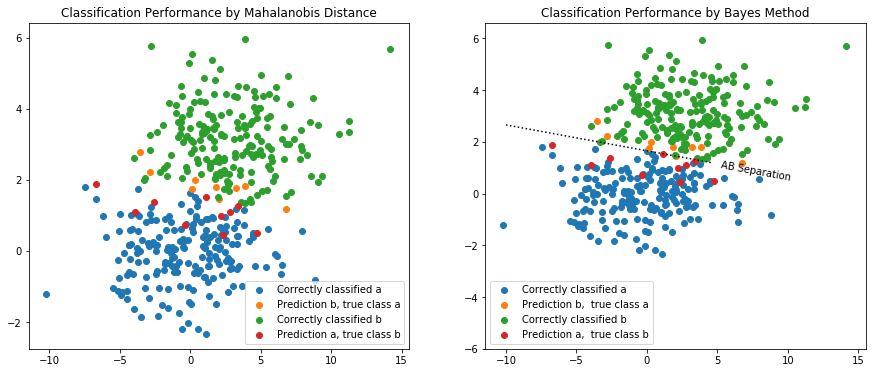

In [17]:
#display comparison

fig, ax = plt.subplots(1, 2, figsize=(15,6))

# Mahalanobis distance accuracy 
ax[0].scatter(a_correct_list_mah[:, 0], a_correct_list_mah[:, 1], label = 'Correctly classified a')
ax[0].scatter(a_wrong_list_mah[:, 0], a_wrong_list_mah[:, 1], label = 'Prediction b, true class a')
ax[0].scatter(b_correct_list_mah[:, 0], b_correct_list_mah[:, 1], label = 'Correctly classified b')
ax[0].scatter(b_wrong_list_mah[:, 0], b_wrong_list_mah[:, 1], label = 'Prediction a, true class b')
ax[0].set_title("Classification Performance by Mahalanobis Distance")

# Bayesian classifier accuracy
ax[1].scatter(a_correct_list_bayes[:, 0], a_correct_list_bayes[:, 1], label = 'Correctly classified a')
ax[1].scatter(a_wrong_list_bayes[:, 0], a_wrong_list_bayes[:, 1], label = 'Prediction b,  true class a')
ax[1].scatter(b_correct_list_bayes[:, 0], b_correct_list_bayes[:, 1], label = 'Correctly classified b')
ax[1].scatter(b_wrong_list_bayes[:, 0], b_wrong_list_bayes[:, 1], label = 'Prediction a,  true class b')
#add the decision line 
contour_item = ax[1].contour(x_range, y_range, curve_ab, 0,linestyles='dotted', colors='black')
contour_item.levels = ['AB Separation' for val in contour_item.levels]
ax[1].clabel(contour_item, contour_item.levels, inline=True, fontsize=10, colors='black')
ax[1].set_title("Classification Performance by Bayes Method")

ax[0].legend()
ax[1].legend()
plt.show()

In [18]:
print('Bayesian Classification:')
print('   Accuracy for dataset \'a\' = {}'.format(accuracy_a_bayes))
print('   Accuracy for dataset \'b\'= {}'.format(accuracy_b_bayes))
print('   Accuracy for all data in \'a\' and \'b\' datasets = {:2f}'.format(0.5 * (accuracy_a_bayes + accuracy_b_bayes)))
print('Mahalanobis Distance:')
print('   Accuracy for dataset \'a\' = {}'.format(accuracy_a_mah))
print('   Accuracy for dataset \'b\'= {}'.format(accuracy_b_mah))
print('   Accuracy for all data in \'a\' and \'b\' datasets = {:2f}'.format(0.5 * (accuracy_a_mah + accuracy_b_mah)))

Bayesian Classification:
   Accuracy for dataset 'a' = 0.955
   Accuracy for dataset 'b'= 0.95
   Accuracy for all data in 'a' and 'b' datasets = 0.952500
Mahalanobis Distance:
   Accuracy for dataset 'a' = 0.955
   Accuracy for dataset 'b'= 0.95
   Accuracy for all data in 'a' and 'b' datasets = 0.952500


Both the plots and the accuracy results show similar results for the Mahalanobis distance and Bayesian classifer methods. It proves that for the Bayasian classification for normal laws, if the covariance matrix  $\Sigma$  is not diagoal, the most probable class is indeed the one which minimizes the Mahalanobis distance. It also validated our hypothesis of having the same prior probabilities for `a` and `b`.

## Part 2
In this part, we aim to classify digits using the complete version of MNIST digits dataset.
The dataset consists of 60'000 training images and 10'000 test images of handwritten digits.
Each image has size 28x28, and has assigned a label from zero to nine, denoting the digits value.
Given this data, your task is to construct a Multilayer Perceptron (MLP) for supervised training and classification and evaluate it on the test images.

Download the MNIST dataset (all 4 files) from http://yann.lecun.com/exdb/mnist/ under `lab-03-data/part2`.
You can then use the script provided below to extract and load training and testing images in Python.

To create an MLP you are free to choose any library.
In case you don't have any preferences, we encourage you to use the [scikit-learn] package; it is a simple, efficient and free tool for data analysis and machine learning.
In this [link][sklearn-example], you can find a basic example to see how to create and train an MLP using [scikit-learn].
Your network should have the following properties:
* Input `x`: 784-dimensional (i.e. 784 visible units representing the flattened 28x28 pixel images).
* 100 hidden units `h`.
* 10 output units `y`, i.e. the labels, with a value close to one in the i-th class representing a high probability of the input representing the digit `i`.

If you need additional examples you can borrow some code from image classification tutorials.
However, we recommend that you construct a minimal version of the network on your own to gain better insights.

[scikit-learn]: http://scikit-learn.org/stable/index.html
[sklearn-example]: http://scikit-learn.org/stable/modules/neural_networks_supervised.html

### 2.1 Dataset loading
Here we first declare the methods `extract_data` and `extract_labels` so that we can reuse them later in the code.
Then we extract both the data and corresponding labels, and plot randomly some images and corresponding labels of the training set.

In [3]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

def extract_data(filename, image_shape, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(16)
        buf = bytestream.read(np.prod(image_shape) * image_number)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(image_number, image_shape[0], image_shape[1])
    return data


def extract_labels(filename, image_number):
    with gzip.open(filename) as bytestream:
        bytestream.read(8)
        buf = bytestream.read(1 * image_number)
        labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    return labels

In [20]:
image_shape = (28, 28)
train_set_size = 60000
test_set_size = 10000

data_part2_folder = os.path.join(data_base_path, data_folder, 'part2')

train_images_path = os.path.join(data_part2_folder, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_part2_folder, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_part2_folder, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_part2_folder, 't10k-labels-idx1-ubyte.gz')

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

[48824 11932 11570  6105  4442 17181  8684 49927 44794 38116]


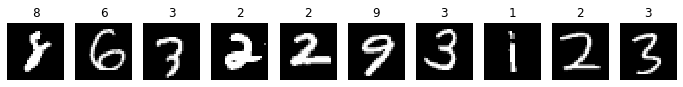

In [81]:
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=train_set_size, size=10)

fig, axes = plt.subplots(1, 10, figsize=(12, 3))
for ax, im, lb in zip(axes, train_images[plt_ind], train_labels[plt_ind]):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(lb)

### 2.2 MLP

We will use the PyTorch library to construct an MLP neural network. We choose an architecture with two hidden layers of 100 nodes each because it turned out to give better results than only one hidden layer.


In [22]:
import torch 
from torch import Tensor 
from torch import nn
from torch.nn import functional as F
from torch import optim

#### 1. Preprocessing
First, we convert the inputs and labels to Tensors and flatten the inputs from $28 \times 28$ to 784-dimensional representing the flatten 2D image.

In [54]:
#conditions 
n_input = 784
n_hidden = 100
n_output = 10
np.random.seed(0)

In [24]:
def preprocessing(data,labels): 
    return (torch.from_numpy(data).view(-1, n_input), torch.from_numpy(labels))

In [25]:
#conversion to tensors and flattening 
train_images_, train_labels_ = preprocessing(train_images,train_labels)
test_images_, test_labels_ = preprocessing(test_images,test_labels)

#### 2. Neural Network implementation
Using Pytorch implemented functions, we define our neural network with 3 linear layers. On the 2 first ones, we apply the chosen activation function Rectified Linear Units (ReLU). We choose this activation function because it is computationally lighter than others and because it prevents the apparition of the vanishing gradient problem. 

Pytorch library presents the advantageous autograd mechanism that consists in stocking the operations done on a variable (in the Tensor form) to automatically be able to calculate the backward pass when needed to optimize the parameters of the model. Hence the functional F.relu is an autograd complient function, similarly to the other operations we could perform in the following.

In [73]:
#define the net 
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_input, n_hidden)
        self.fc2 = nn.Linear(n_hidden,n_hidden)
        self.fc3 = nn.Linear(n_hidden, n_output)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)


    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#### 3. Training the model

Now that the neural network is defined, it needs to be trained on our data set. We use an Adam optimizer, an adaptive learning rate optimization algorithm that’s been designed specifically for training deep neural networks, on a mini-batch approach. We previously compared it to using a stochastic gradient descent optimizer and the results on the last one were less promising.

Finally we plot the resuls for each epoch of the training to have an idea of the progression of the optimization. We used the cross entropy loss and the accuracy to get an idea of the performances.

In [94]:
def train_model(model, train_input, train_target, mini_batch_size, epochs):
    
    optimizer = optim.Adam(model.parameters(), lr=0.01) 
    losses_tr = []
    accuracies_tr = []
    
    losses_te = []
    accuracies_te = []
    
    print("Start training Multi Layer Perceptron model...")
    
    model.train()
    
    for e in range(epochs):
        sum_loss=0.0
        correct=0.0

        # We do this with mini-batches
        for b in range(0, train_input.size(0), mini_batch_size):
            optimizer.zero_grad()
            
            output = model(train_input.narrow(0, b, mini_batch_size))

            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))            
            loss.backward()
            
            optimizer.step() #equivalent of the for loop update 
          
        #results for training
        avg_loss_tr, avg_accuracy_tr = compute_performances(model, train_images_, train_labels_, mini_batch_size)
        if e % display_step ==0:            
            print('Epoch: %02d' %(e), ': train loss = ' + "{:.3f}".format(avg_loss_tr), ', train accuracy: ' + "{:.3f}".format(avg_accuracy_tr) + "%")
        losses_tr.append(avg_loss_tr)
        accuracies_tr.append(avg_accuracy_tr)
        
        #results for testing
        avg_loss_te, avg_accuracy_te = compute_performances(model, test_images_, test_labels_, mini_batch_size)
        if e % display_step ==0:            
            print('            test loss = ' + "{:.3f}".format(avg_loss_te), ', test accuracy: ' + "{:.3f}".format(avg_accuracy_te) + "%")
        losses_te.append(avg_loss_te)
        accuracies_te.append(avg_accuracy_te)
        
    # plot the accuracy and loss
    plt.figure(figsize = (20,10))
    plt.subplot(221)
    plt.plot(range(epochs), losses_tr, color='r')
    plt.xticks([0, 5, 10, 15, 20, 25])
    plt.title("Average Loss at training")
    plt.subplot(222)
    plt.plot(range(epochs), accuracies_tr)
    plt.xticks([0, 5, 10, 15, 20, 25])
    plt.title("Accuracy at training (in %)")
    plt.subplot(223)
    plt.plot(range(epochs), losses_te, color='r')
    plt.xticks([0, 5, 10, 15, 20, 25])
    plt.title("Average Loss at testing")
    plt.subplot(224)
    plt.plot(range(epochs), accuracies_te)
    plt.xticks([0, 5, 10, 15, 20, 25])
    plt.title("Accuracy at testing (in %)")
    plt.show()
            
    print("Training done...")
      

In [77]:
def compute_performances(model, inputs, labels, mini_batch_size):
    
    model.eval()
    
    sum_loss=0.0
    correct=0.0
    
    losses = []
    accuracies = []
    
    for b in range(0, inputs.size(0), mini_batch_size):
        #get the outputs from the trained model
        output = model(inputs.narrow(0, b, mini_batch_size)) #should have done it by mini batches 

        loss = criterion(output, labels.narrow(0, b, mini_batch_size))
        sum_loss += loss.item()
        
        predicted = torch.argmax(output, 1)
        correct += (predicted == labels.narrow(0, b, mini_batch_size)).sum().double()
    
    avg_loss=sum_loss/inputs.shape[0]
    avg_acc=100 * correct/inputs.shape[0]
    
    return avg_loss, avg_acc
    
    #print('Loss = {:.3f}'.format(avg_loss), "Accuracy: {:.3f}%".format(avg_acc))

Start training Multi Layer Perceptron model...
Epoch: 00 : train loss = 0.019 , train accuracy: 22.545%
            test loss = 0.019 , test accuracy: 22.450%
Epoch: 05 : train loss = 0.007 , train accuracy: 79.562%
            test loss = 0.007 , test accuracy: 79.770%
Epoch: 10 : train loss = 0.004 , train accuracy: 87.482%
            test loss = 0.004 , test accuracy: 87.130%
Epoch: 15 : train loss = 0.004 , train accuracy: 89.043%
            test loss = 0.004 , test accuracy: 88.370%
Epoch: 20 : train loss = 0.004 , train accuracy: 88.260%
            test loss = 0.005 , test accuracy: 87.550%


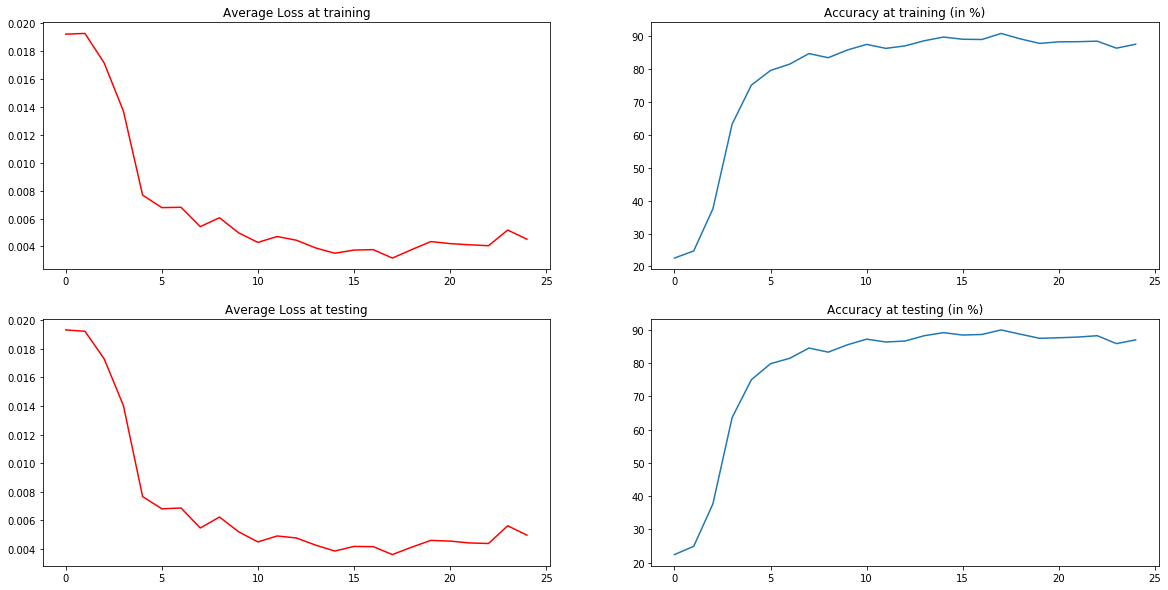

Training done...


In [93]:
model, criterion = Net(), nn.CrossEntropyLoss()
mini_batch_size = 100
epochs=25
display_step = 5

#train the parameters of the model on the dataset
train_model(model, train_images_, train_labels_, mini_batch_size, epochs)

#### Analysis and discussion
We can see pretty good performances, with a decreasing loss and an increasing accuracy during training, both reaching a plateau around the end. We also see that it doesn't seem to be overfitting, which makes sense regarding the low complexity of the network. 

#### Vizualization of the results
Finally, we vizualize the results on a random sample of the images. We see that the network was well-trained in recognizing the images as we only see one misclassified image. 

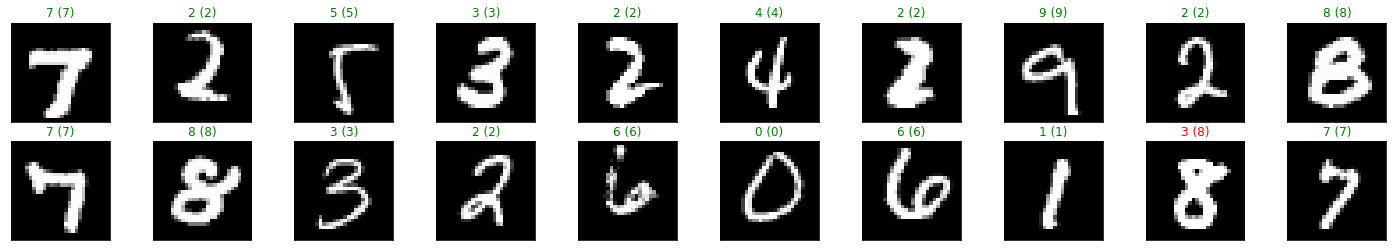

In [120]:
# obtain one batch of test images
nb_im=20
prng = np.random.RandomState(seed=123456789)  # seed to always re-draw the same distribution
plt_ind = prng.randint(low=0, high=test_set_size, size=nb_im)

images=[]
labels=[]
for i in plt_ind:
    images.append(test_images[i])
    labels.append(test_labels[i])

images, labels = np.array(images),np.array(labels)
images_,labels_=preprocessing(images, labels)

# get sample outputs
output = model(images_.float())
# convert output probabilities to predicted class
preds = torch.argmax(output, 1)


# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in range(nb_im):
    ax = fig.add_subplot(nb_im/10, 10, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx], cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))